In [2]:
from mcm import EcModel
import importlib
import numpy as np

reference= 'notebook'
composition = 'zhang_2022_cd07-2'
rxnName = 'eclogitization_agu13_stx21_rx'

In [3]:
mod = importlib.import_module("compositions."+composition)
Cik0, Xik0, mi0, phii0, phase_names, endmember_names = [getattr(mod,a,None) for a in ['Cik0', 'Xik0', 'mi0','phii0', 'phase_names', 'endmember_names']]

rxn = EcModel.get_reaction(rxnName)

def x2c(rxn, Xik0):
    return np.asarray([c for (i, ph) in enumerate(rxn.phases()) for c in ph.x_to_c(Xik0[i])])
def phi2m(rxn, phii0, Cik0, T=900.,p=10000.):
    '''Converts phase modes in volume fraction to mass fraction given an intial EM composition in mass fractions.'''    

    densities = []
    C = rxn.zero_C()
    Ki = 0
    for i,ph in enumerate(rxn.phases()):
        n = len(ph.endmembers())
        C[i] = Cik0[Ki:Ki+n]
        Ki = Ki+n

    C = [np.maximum(np.asarray(C[i]), eps*np.ones(len(C[i]))) for i in range(len(C))]
    C = [np.asarray(C[i])/sum(C[i]) for i in range(len(C))]

    densities = [ph.rho(T, p, C[i]) for i,ph in enumerate(rxn.phases())]
    mass = np.sum(np.asarray(densities) * np.asarray(phii0))
    mi0 = np.asarray([v*densities[i]/mass for (i, v) in enumerate(phii0)])

    return mi0

Cik0 = x2c(rxn, Xik0) if Cik0 is None else Cik0
mi0 = phi2m(rxn, phii0, Cik0) if mi0 is None else mi0

2.5 773.0
[-1.31423712e-01 -1.57183161e-02  0.00000000e+00 -3.75828696e-02
 -2.76476240e-04  3.28378657e-02  1.38059590e-01  1.57465984e-01
  1.80623694e-01 -3.43677294e-03  1.52773613e-02  3.58656846e-04
 -1.28406972e-01 -1.63114143e-01 -6.97497441e-03 -3.78376470e-02
  0.00000000e+00  1.48730979e-04]


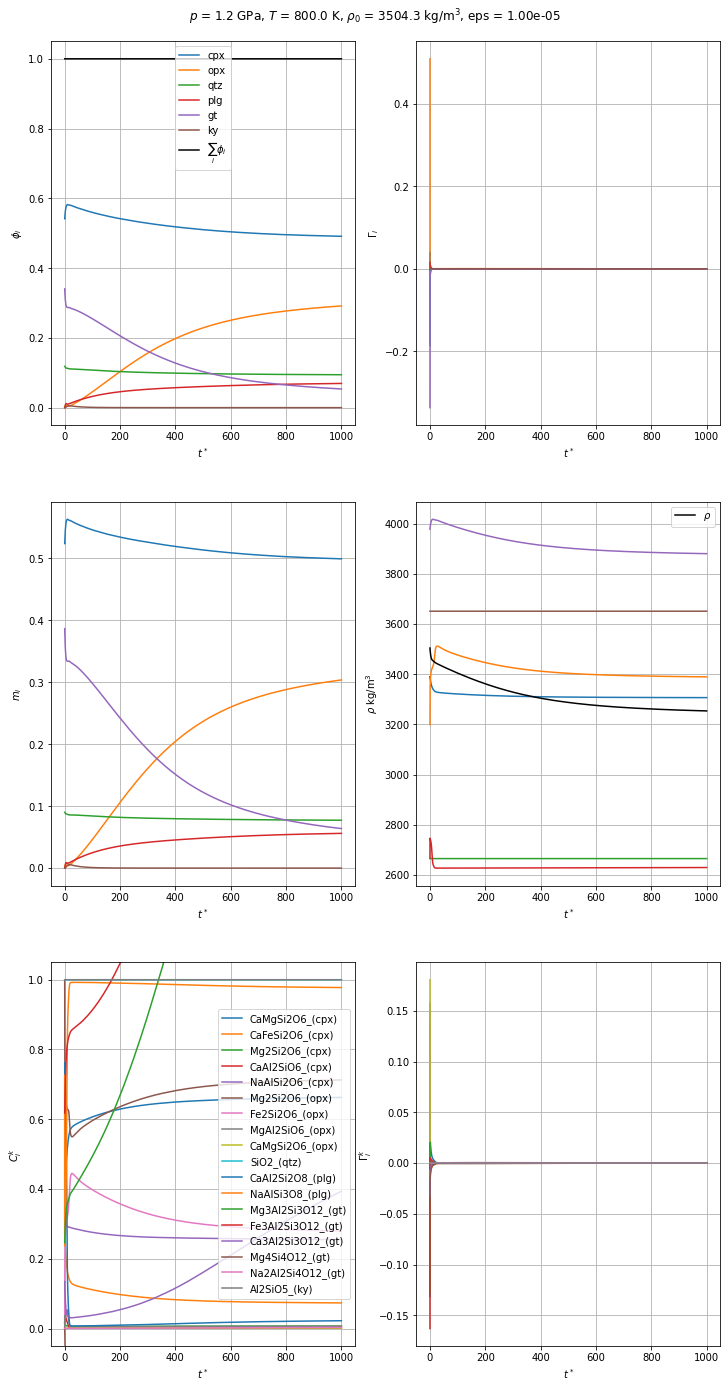

,Clinopyroxene_slb_ph,Orthopyroxene_slb_ph,Quartz_slb_ph,Feldspar_slb_ph,Garnet_slb_ph,Kyanite_slb_ph
Wt% (initial),0.523500,0.000000,0.090100,0.000000,0.386500,0.000000
Wt% (final),0.499192,0.303704,0.077271,0.056058,0.063873,0.000001


(<py_eclogitization_agu13_stx21_rx.eclogitization_agu13_stx21_rx at 0xffff72950e70>,
 None,
 None)

In [7]:
T_range = np.linspace(773,1273,50)
P_range = np.linspace(2.5,0.5,50)
P0=P_range[0]
T0=T_range[0]
print(P0,T0)
model = EcModel(
    reference,
    "eclogitization_agu13_stx21_rx",
    mi0=mi0,
    Cik0=Cik0,
    P0=1.2,
    T0=800.,
    nP=0,
    nT=0
)

model.run(reload=False,save=False,end_t=1000,eps=1.e-5)


In [ ]:
nu = model.rxn.nu()
print(nu)

In [ ]:
model = EcModel(
    reference,
    "eclogitization_agu5_stx21_rx",
    domain="profile",
    mi0=mi0,
    Xik0=Xik0,
    P0=0.5,
    T0=1273,
    Pmin=0.5,
    Pmax=2.5,
    Tmin=1273,
    Tmax=773,
    nP=50,
    nT=50
)

model.run(reload=False,save=False,plot=True,end_t=1e3,eps=1.e-3)

In [ ]:
import matplotlib.pyplot as plt
model.bdfdiag.plot_modes_of_all_phases()
plt.ylim([0.005, 0.615])
plt.xlim([773,1273])
plt.xticks([873, 973, 1073, 1173, 1273])
plt.yticks([0.005,0.123,0.246,0.369,0.492,0.615])
plt.show()